In [23]:
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
dest = pd.read_excel(r"C:\Users\jacob\OneDrive\Desktop\Fall 2024\Telling Stories\housing_report\report-data-2024\Destinations_10.29.22-10.29.2024.xlsx")


In [25]:
# Creating the repeat dataframe
repeat = dest[dest["HMIS ID"].duplicated(keep=False)]

In [26]:
# Define the aggregation function with the new columns
def process_group(group):
    # Sort by Exit Date
    sorted_group = group.sort_values(by="Exit Date")
    
    # Extract entry, exit dates, and destinations
    entry_dates = sorted_group["Entry Date"].tolist()
    exit_dates = sorted_group["Exit Date"].tolist()
    destinations = sorted_group["Entry/Exit Destination"].tolist()
    
    return pd.Series({
        "hmis_id": group["HMIS ID"].iloc[0],
        "repeats": len(group),
        "entry_1": entry_dates[0] if len(entry_dates) > 0 else None,
        "exit_1": exit_dates[0] if len(exit_dates) > 0 else None,
        "entry_2": entry_dates[1] if len(entry_dates) > 1 else None,
        "exit_2": exit_dates[1] if len(exit_dates) > 1 else None,
        "des_1": destinations[0] if len(destinations) > 0 else None,
        "des_2": destinations[1] if len(destinations) > 1 else None,
        "veteran": group["Veteran"].mode().iloc[0] if not group["Veteran"].mode().empty else None,
        "d_o_b": group["Date of Birth"].mode().iloc[0] if not group["Date of Birth"].mode().empty else None,
        "household": group["Household Type"].mode().iloc[0] if not group["Household Type"].mode().empty else None,
        "pregnant": sum(group["Pregnant"] != "No"),
        "chronic": group["Chronicity"].mode().iloc[0] if not group["Chronicity"].mode().empty else None,
        "race": group["Race (Retired)"].mode().iloc[0] if not group["Race (Retired)"].mode().empty else None,
        "ethn": group["Ethnicity (Retired)"].mode().iloc[0] if not group["Ethnicity (Retired)"].mode().empty else None,
        "age" : group["Age"].mode().iloc[0] if not group["Age"].mode().empty else None
    })

# Group by "HMIS ID" and apply the aggregation function
rep = repeat.groupby("HMIS ID").apply(process_group).reset_index(drop=True)



C:\Users\jacob\AppData\Local\Temp\ipykernel_3508\734433227.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rep = repeat.groupby("HMIS ID").apply(process_group).reset_index(drop=True)


In [27]:
# Ensure "Entry Date" is in datetime format
dest["Entry Date"] = pd.to_datetime(dest["Entry Date"])

# Identify rows where "HMIS ID" is not duplicated
non_duplicates = dest[~dest["HMIS ID"].duplicated(keep=False)]

# Identify the earliest row for each group of duplicate "HMIS ID" values
duplicates_earliest = (
    dest[dest["HMIS ID"].duplicated(keep=False)]  # Select duplicated rows
    .sort_values(by=["HMIS ID", "Entry Date"])    # Sort by "HMIS ID" and "Entry Date"
    .drop_duplicates(subset="HMIS ID", keep="first")  # Keep the earliest row for each "HMIS ID"
)

# Combine non-duplicates and earliest duplicates
pop = pd.concat([non_duplicates, duplicates_earliest]).reset_index(drop=True)

In [28]:
print(pop.columns)

Index(['HMIS ID', 'Entry/Exit Destination', 'Entry Date', 'Exit Date',
       'Days to Destination', 'Veteran', 'Date of Birth', 'Age',
       'Household Type', 'Pregnant', 'Chronicity', 'Race (Retired)',
       'Ethnicity (Retired)'],
      dtype='object')


In [29]:
row_count_p = len(pop)
print(f"The 'pop' dataframe contains {row_count_p} rows.")
row_count_r = len(rep)
print(f"The 'rep' dataframe contains {row_count_r} rows.")


The 'pop' dataframe contains 1731 rows.
The 'rep' dataframe contains 166 rows.


In [30]:
# Filter rows where "Entry/Exit Destination" is not "No exit interview completed (HUD)"
r_pop = pop[pop["Entry/Exit Destination"] != "No exit interview completed (HUD)"].reset_index(drop=True)



In [31]:
# Create r_1st dataframe: rows where "des_1" is not "No exit interview completed (HUD)"
r_1st = rep[rep["des_1"] != "No exit interview completed (HUD)"].reset_index(drop=True)

# Create r_2nd dataframe: rows where "des_2" is not "No exit interview completed (HUD)"
r_2nd = rep[rep["des_2"] != "No exit interview completed (HUD)"].reset_index(drop=True)

In [32]:
# Get the counts of values in "Entry/Exit Destination" in descending order
destination_counts = r_pop["Entry/Exit Destination"].value_counts()

# Display the counts
print(f"The length of 'r_pop' is: {len(r_pop)} rows.")
print("Values for 'Entry/Exit Destination' in 'r_pop' with their counts:")
print(destination_counts)


The length of 'r_pop' is: 527 rows.
Values for 'Entry/Exit Destination' in 'r_pop' with their counts:
Entry/Exit Destination
Rental by client, with ongoing housing subsidy (HUD)                                                                                   156
Rental by client, no ongoing housing subsidy (HUD)                                                                                     114
Emergency shelter, including hotel or motel paid for with emergency shelter voucher, Host Home shelter (HUD)                            35
Staying or living with family, permanent tenure (HUD)                                                                                   30
Jail, prison, or juvenile detention facility (HUD)                                                                                      27
Deceased (HUD)                                                                                                                          25
Staying or living with family, temporary 

In [33]:
# Get the counts of values in "Entry/Exit Destination" in descending order
destination_counts = r_1st["des_1"].value_counts()

# Display the counts
print(f"The length of 'r_1st' is: {len(r_1st)} rows.")
print("Values for 'Entry/Exit Destination' in 'r_1st' with their counts:")
print(destination_counts)


The length of 'r_1st' is: 57 rows.
Values for 'Entry/Exit Destination' in 'r_1st' with their counts:
des_1
Rental by client, no ongoing housing subsidy (HUD)                                                                                     15
Rental by client, with ongoing housing subsidy (HUD)                                                                                   15
Jail, prison, or juvenile detention facility (HUD)                                                                                      5
Emergency shelter, including hotel or motel paid for with emergency shelter voucher, Host Home shelter (HUD)                            5
Staying or living with family, temporary tenure (e.g., room, apartment, or house) (HUD)                                                 4
Place not meant for habitation (e.g., a vehicle, an abandoned building, bus/train/subway station/airport or anywhere outside) (HUD)     3
Staying or living with family, permanent tenure (HUD)            

In [34]:
# Get the counts of values in "Entry/Exit Destination" in descending order
destination_counts = r_2nd["des_2"].value_counts()

# Display the counts
print(f"The length of 'r_2nd' is: {len(r_2nd)} rows.")
print("Values for 'Entry/Exit Destination' in 'r_2nd' with their counts:")
print(destination_counts)


The length of 'r_2nd' is: 74 rows.
Values for 'Entry/Exit Destination' in 'r_2nd' with their counts:
des_2
Rental by client, with ongoing housing subsidy (HUD)                                                                                   24
Rental by client, no ongoing housing subsidy (HUD)                                                                                     20
Jail, prison, or juvenile detention facility (HUD)                                                                                      6
Deceased (HUD)                                                                                                                          4
Staying or living with family, permanent tenure (HUD)                                                                                   4
Psychiatric hospital or other psychiatric facility (HUD)                                                                                3
Staying or living with family, temporary tenure (e.g., room, apar

In [35]:
# Get all values and their counts in descending order for "Veteran"
veteran_counts = pop["Veteran"].value_counts()

# Display the counts
print("Values for 'Veteran' in 'pop' with their counts in descending order:")
print(veteran_counts)


Values for 'Veteran' in 'pop' with their counts in descending order:
Veteran
No (HUD)                              1438
Yes (HUD)                              214
Client prefers not to answer (HUD)      20
Data not collected (HUD)                11
Client doesn't know (HUD)                1
Name: count, dtype: int64


In [36]:
# Get all values and their counts in descending order for "Veteran"
veteran_counts = rep["veteran"].value_counts()

# Display the counts
print("Values for 'Veteran' in 'rep' with their counts in descending order:")
print(veteran_counts)


Values for 'Veteran' in 'rep' with their counts in descending order:
veteran
No (HUD)                    137
Yes (HUD)                    21
Data not collected (HUD)      2
Name: count, dtype: int64


In [37]:
pop_race = pop["Race (Retired)"].value_counts()

# Display the counts
print("Values for 'race' in 'pop' with their counts in descending order:")
print(pop_race)

pop_ethn = pop["Ethnicity (Retired)"].value_counts()

# Display the counts
print("Values for 'ethnicity' in 'pop' with their counts in descending order:")
print(pop_ethn)

rep_race = rep["race"].value_counts()

# Display the counts
print("Values for 'race' in 'rep' with their counts in descending order:")
print(rep_race)

ethn_race = rep["ethn"].value_counts()

# Display the counts
print("Values for 'race' in 'rep' with their counts in descending order:")
print(ethn_race)

Values for 'race' in 'pop' with their counts in descending order:
Race (Retired)
White (HUD)                                            1042
American Indian, Alaska Native, or Indigenous (HUD)     273
Black, African American, or African (HUD)                51
Client refused (HUD)                                     28
Data not collected (HUD)                                 19
Native Hawaiian or Pacific Islander (HUD)                11
Asian or Asian American (HUD)                             4
Client doesn't know (HUD)                                 3
Name: count, dtype: int64
Values for 'ethnicity' in 'pop' with their counts in descending order:
Ethnicity (Retired)
Non-Hispanic/Non-Latin(a)(o)(x) (HUD)    1134
Hispanic/Latin(a)(o)(x) (HUD)             104
Client refused (HUD)                       33
Data not collected (HUD)                   22
Client doesn't know (HUD)                   3
Name: count, dtype: int64
Values for 'race' in 'rep' with their counts in descending order:


In [38]:
# Calculate the average value of "Age" in "pop"
average_age_pop = pop["Age"].mean()

# Calculate the average value of "age" in "rep"
average_age_rep = rep["age"].mean()

# Display the results
print(f"The average value of 'Age' in 'pop' is: {average_age_pop:.2f}")
print(f"The average value of 'age' in 'rep' is: {average_age_rep:.2f}")


The average value of 'Age' in 'pop' is: 46.99
The average value of 'age' in 'rep' is: 48.10


In [39]:
# Calculate the average value for "Days to Destination" in "pop"
average_days_to_destination = pop["Days to Destination"].mean()

# Display the result
print(f"The average value for 'Days to Destination' in 'pop' is: {average_days_to_destination:.2f} days.")


The average value for 'Days to Destination' in 'pop' is: 251.67 days.


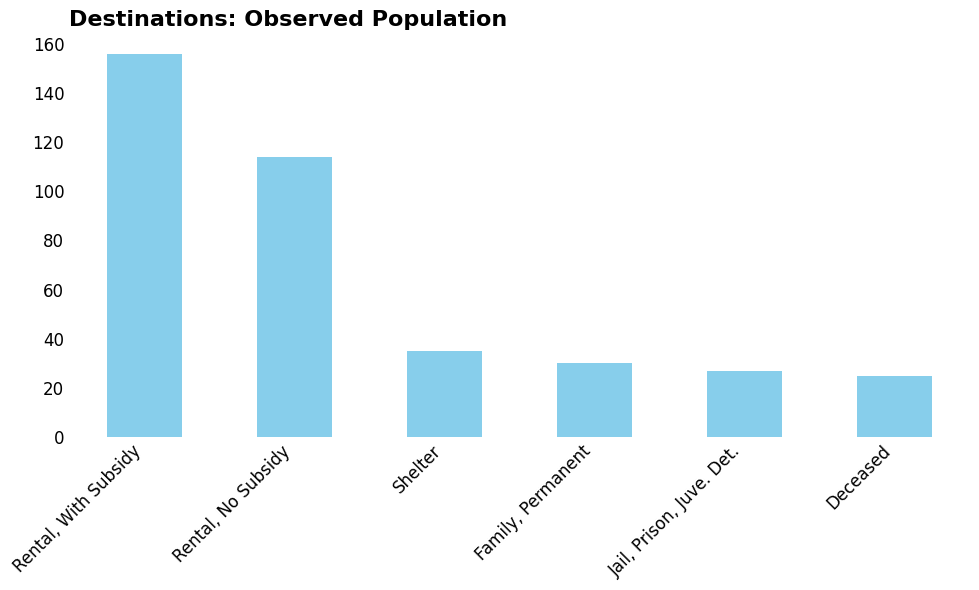

In [42]:

# Calculate the counts of each unique value in the "Entry/Exit Destination" column
value_counts = r_pop['Entry/Exit Destination'].value_counts()

# Filter to include only the top 6 values
top_6 = value_counts.head(6)

# Define custom titles for the x-axis bars
custom_titles = [
    "Rental, With Subsidy",
    "Rental, No Subsidy",
    "Shelter",
    "Family, Permanent",
    "Jail, Prison, Juve. Det.",
    "Deceased"
]

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_6.plot(kind='bar', color='skyblue', edgecolor='none')

# Customize the chart
plt.title('Destinations: Observed Population', fontsize=16, weight='bold', loc='left')
plt.xticks(ticks=range(len(custom_titles)), labels=custom_titles, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Remove x and y axis titles
plt.xlabel('')
plt.ylabel('')

# Remove tick marks
plt.tick_params(axis='x', length=0)  # Remove x-axis ticks
plt.tick_params(axis='y', length=0)  # Remove y-axis ticks

# Remove the border line around the entire plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


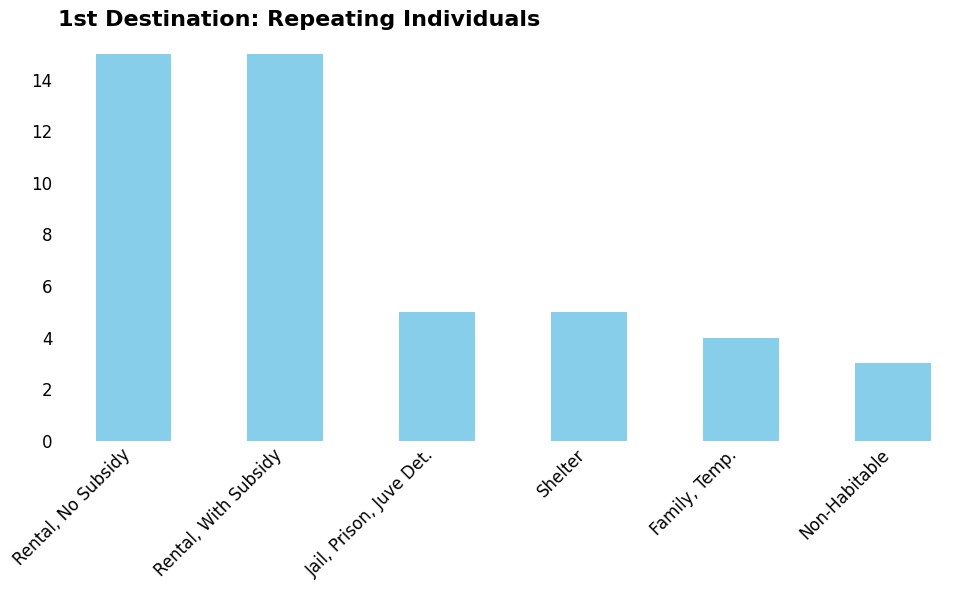

In [46]:

# Calculate the counts of each unique value in the "des_1" column from r_1st
value_counts_r1st = r_1st['des_1'].value_counts()

# Filter to include only the top 6 values
top_6_r1st = value_counts_r1st.head(6)

# Define custom titles for the x-axis bars
custom_titles = [
    "Rental, No Subsidy",
    "Rental, With Subsidy",
    "Jail, Prison, Juve Det.",
    "Shelter",
    "Family, Temp.",
    "Non-Habitable"
]

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_6_r1st.plot(kind='bar', color='skyblue', edgecolor='none')

# Customize the chart
plt.title('1st Destination: Repeating Individuals', fontsize=16, weight='bold', loc='left')
plt.xticks(ticks=range(len(custom_titles)), labels=custom_titles, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Remove x and y axis titles
plt.xlabel('')
plt.ylabel('')

# Remove tick marks
plt.tick_params(axis='x', length=0)  # Remove x-axis ticks
plt.tick_params(axis='y', length=0)  # Remove y-axis ticks

# Remove the border line around the entire plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


In [44]:
print(r_1st.columns)

Index(['hmis_id', 'repeats', 'entry_1', 'exit_1', 'entry_2', 'exit_2', 'des_1',
       'des_2', 'veteran', 'd_o_b', 'household', 'pregnant', 'chronic', 'race',
       'ethn', 'age'],
      dtype='object')
